# Assignment 2 - DS4Biz Y63
## TextScraping_Classification
***

### Team Detail
**Team Name**: jonas   
***
### *Student 1*
**Student ID**: 61070296   
**Student Full Name**: ณัฐวุฒิ  อกนิษฐ์ศุภร
***
### *Student 2*
**Student ID**: 61070319   
**Student Full Name**: โรจนัสถ์ รอดรุ่งเรือง
***

# Import Library

In [46]:
import requests
import bs4
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('max_columns',None)
import nltk
from sklearn.model_selection import cross_val_score , GridSearchCV
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kontup/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Scraping Websites

### Link Websites

In [47]:
url = 'https://quotes.toscrape.com'#เป็นlinkที่จะนำไปใช้ในการทำ Web Scraping

### Function scraping web & save data in text file

In [48]:
listC_texts=[]#เป็นlistที่ทำการเก็บquotesเอาไว้เพื่อเตรียมจะเขียนลงไปในfile Quoet_content.text
listT_texts = []#เป็นlistที่ทำการเก็บquotesเอาไว้เพื่อเตรียมจะเขียนลงไปในfile target.text
'''
Fuction responde เป็นfunctionที่ทำการไปดึงข้อมูลหน้าออกมาอยู่ในรูปแบบของ Htmlformat

Fuction target_text เป็นfunctionท่ีทำการดึงเฉพาะข้อมูลtag ของแต่ละquotes มาเก็บไว้ในlistT_texts เพื่อเตรียมส่งไปsave 
ไว้ในtarget.text

Fuction content_text เป็นfunctionท่ีทำการดึงเฉพาะข้อมูลเนื้อหาของquotes และ ชื่อคนเขียนมาเก็บไว้ลงในlistlistC_textsเพื่อเตรียมส่ง
ไปsave ไว้ในQuoet_content.text

Fuction savetext เป็นfunctionท่ีทำการนำข้อมูลจากlistC_texts และ listT_texts มาsave เป็น Quoet_content.text and target.text
ตามลำดับ
'''
def responde(url):#def responde จะทำการรับค่า url เข้ามาใช้
    response = requests.get(url)#เป็นการgetข้อมูลหน้าเว็บเข้ามาเก็บใน ตัวแปล response
    html_page = bs4.BeautifulSoup(response.content, 'lxml') #เราก็ใช้ BeautifulSoup ในการแปลงเนื้อหาข้อมูลที่ดึงมาเป็นรูปแบบHtml
    target_text(html_page)#เราก็ทำการเรียกใช้fuction target_text เพื่อส่งค่าเนื้อหาข้อมูลที่ดึงมาไปดึงข้อมูลtags 
    content_text(html_page)#เราก็ทำการเรียกใช้fuction content_text เพื่อส่งค่าเนื้อหาข้อมูลที่ดึงมาไปดึงเนื้อหาquotesและชื่อคนเขียน
    selecter = 'li.next > a'#เป็นการสร้างเงื่อนไขว่าเราจะดึงข้อมูลจากtagHtml li ที่มีclass=next ที่เป็นtag ประเภท <a>
    tag = html_page.select_one(selecter)#เป็นการเอาเงื่อไขที่กำหนดไว้ไปดึงข้อมูลของ href ใน <a> เพื่อนำไปใช้linkไปหน้าเว็บต่อไป 
    while tag != None:#เป็นการloopเพื่อจะเข้าไปยังหน้าเว็บต่อไป
            url='https://quotes.toscrape.com'+tag['href']#เป็นการสร้างurlหน้าเว็บต่อไปที่จะดึง
            response = requests.get(url)
            html_page = bs4.BeautifulSoup(response.content, 'lxml')
            target_text(html_page)
            content_text(html_page)
            selecter = 'li.next > a'
            tag = html_page.select_one(selecter)


def target_text(html_page):#def target_text จะทำการรับค่า html_page เข้ามาใช้
    selecter = 'div.tags>meta.keywords'#เป็นการสร้างเงื่อนไข้เพื่อดึงข้อมูลtagของเนื้อหาquotesนั้นๆ
    tag = html_page.select(selecter)#จะเป็นlist ข้อมูลที่ผ่านเงื่อนไขของการดึงtagHtml
    for i in tag:#ทำการloopเพื่อดึงข้อมูล ของ tagของเนื้อหาquotesนั้นๆ
        listT_texts.append(i['content'])#ทำการเก็บtagของเนื้อหาquotesนั้นๆลงในlist
        
        
        
def content_text(html_page):# def content_text ทำการรับค่า ข้อมูลหน้าเว็บที่เป็นhtml เข้ามา
    selecter = 'div.quote > span'#เป็นการสร้างเงื่อนไข้เพื่อดึงข้อมูลเนื้อหาquotes และ ชื่อผู้เขียน
    tag = html_page.select(selecter)#จะเป็นlist ข้อมูลที่ผ่านเงื่อนไขของการดึงข้อมูลเนื้อหาquotes และ ชื่อผู้เขียน
    for i in range(len(tag)):#เป็นการloop ต่ามจำนวนline taghtml ที่ดึงมา
        if i % 2 == 0:#เป็นการทำเพื่อจะดึงเอาข้อมูลในส่วนของเนื้อหาquotes
            a = tag[i].text[1:-2]#เป็นการดึงข้อมูลเนื้อหาqoutes ออกมาเเละทำการลบ " " หน้าหลังออกไป
        else:
            a += " "+'By'+tag[i].text[2:-8].rstrip()#เป็นการดึงข้อมูลที่เป็นในส้วนของ ชื่อคนเขียนและทำการตัด " (about)" ออกไป
            listC_texts.append(a)#เป็นการนำข้อมูลหลังจากที่ดึง เนื้อหาquotes มาต่อกับ ชื่อคนเขียนเสร็จนำไปเก็บไว้ในlist




def savetext(listC_texts,listT_texts):# def savetext จะรับค่าlistC_texts,listT_texts
    file = open('data/Quoet_content.text','w')#เป็นการสร้างfile Quoet_content.textและเข้าไปเพื่อทำการเขียนข้อมูล
    file2 = open('target/target.text','w')#เป็นการสร้างfile target.textและเข้าไปเพื่อทำการเขียนข้อมูล
    for c in listC_texts:#ทำการloopในlistข้อมูลเพื่อจะทำการเขียนลงไปในfile
        file.write(c+ "\n")#นำlistC_textsลงไปเขียนในQuoet_content.text
    file.close()#เป็นการออกจากfile Quoet_content.text
    for t in listT_texts:#ทำการloopในlistข้อมูลเพื่อจะทำการเขียนลงไปในfile
        file2.write(t+ "\n")#นำlistC_textsลงไปเขียนในtarget.text
    file2.close()#เป็นการออกจากfile target.text
    
responde(url)
savetext(listC_texts,listT_texts)

# Load Data File & Create DataFrame
    เป็นขั้นตอนในการนำข้อมูลที่เก็บได้จากการดึงข้อมูลมาทำการโหลดเข้าเพื่อใช้ในการสร้าง Data frame

### Load data File

In [49]:
'''
อันนี้คือการLoadfile Quoet_content.text มาและทำการแยกข้อมูลระหว่าง ข้อมูลเนื้อหา กับ ชื่อผู้เขียน
ให้อยู่ในlistเพื่อเตรียมนำเข้าDataframe
'''
composer = []#เป็นlistที่เก็บข้อมูลชื่อผู้เขียนเอาไว้
content_text = []#เป็นlistที่เก็บข้อมูลเนื้อหาเอาไว้
file_content = open('data/Quoet_content.text','r')#เป็นการเปิดอ่านfile Quoet_content.text
for i in file_content:#เป็นการloob ดึงของมูลแต่ละแถว
    text = i.rstrip()#เป็นการกำจัด\nด้านหลัง
    content_text.append(text.split('By')[0])#เป็นการแบ่งข้อมูลโดยใช้ byเป็นตัวแยกโดยเราเอาแค่ข้อมูลเนื้อหาของquotesเก็บลงcontent_text
    composer.append(text.split('By')[1])#เป็นการแบ่งข้อมูลโดยใช้ byเป็นตัวแยกโดยเราเอาแค่ข้อมูลชื่อผู้แต่งเก็บลงcomposerlist
file_content.close()#ทำการออกจากfile

In [50]:
'''
อันนี้คือการLoadfile target.text มาและทำการแยกtag ในแต่ละบันทัดมาเพื่อเก็บจำนวนความถี่ของแต่ละtag เก็บในรูปแบบdict
'''
line_of_word=[]#เป็นlist ที่เอาไว้เก็บtagแยกเป็นตัวๆของบันทัดนั้นๆ
word=[]#list ที่เอาไว้รวมtag ทั้งหมดที่มีเพื่อจะนำไปใช้ในการนับจำนวนtagที่ใช้ไป
file_target = open('target/target.text','r')#เป็นการอ่านfile target.text
counts = {}#dict ที่ใช้เก็บชื่อคำศัพท์และเก็บความถี่ที่เจอtagนั้นๆ
for i in file_target:#เป็นการดึงข้อมูลทีละบันทัด
    line_of_word.append(i.rstrip().split(','))#และทำการแบ่งคำโดยแบ่งตรงที่มี , 
for i in line_of_word:#looptag ข้อมูลแต่ละแถวที่ผ่านการแบ่งแล้ว
    for j in i:#loop listคำศัพท์ในแถวนั้นๆ
        word.append(j)#เอาคำศัพท์ไปเก็บเอาไว้
for i in set(word):#loop set ของคำศัพท์ไม่ซ้ำเพื่อเอาไปทำเป็นkey
    if i != '':#โดยที่เราไม่นับ tag ว่าง
        counts[i]=word.count(i)#เป็นการจัดเก็บtag แต่ละอันว่ามีการเรียกใช้ไปเท่าไร
sorts = sorted(counts.items(),key=lambda x: x[1],reverse=True)#เป็นการsorted ข้อมูลsetโดยเรียงจากมากไปน้อย
tag_use = []#เป็นlist ที่เอาไว้ใช้เก็บtag ที่มีมากสุด 15 อันดับcรกโดยถ้ามีจำนวนเท่ากันจะเรียงตามตัวอักษร
for i in sorts[:15]:#loop เอาแค่ข้อมูล15ตัวแรก
    tag_use.append(i[0])#เป็นการนำชื่อtag ไปเก็บในlist
file_target.close()#ออกจากfile

### Create DataFrame

#### dataframe cotent

In [51]:
'''
เป็นการสร้างdataframe ในส่วนของข้อมูล quotes และ composer
'''
df = pd.DataFrame({"quotes":content_text ,
                  "composer":composer})
df

,quotes,composer
0,The world as we have created it is a process o...,Albert Einstein
1,"It is our choices, Harry, that show what we tr...",J.K. Rowling
2,There are only two ways to live your life. One...,Albert Einstein
3,"The person, be it gentleman or lady, who has n...",Jane Austen
4,"Imperfection is beauty, madness is genius and ...",Marilyn Monroe
...,...,...
95,You never really understand a person until you...,Harper Lee
96,You have to write the book that wants to be wr...,Madeleine L'Engle
97,Never tell the truth to people who are not wor...,Mark Twain
98,"A person's a person, no matter how small",Dr. Seuss


#### dataframe target

In [52]:
#สร้างdataframe target 
'''
จะเป็นการนำข้อมูลที่เราเก็บtag มาทำการตรวจดูว่าในข้อมูลquotes นั้นๆว่ามีอยู่ในtagtop 15 หรือไม่
'''
data={}#set ที่เก็บข้อมูลtagเพ่ือเอาไว้ใช้ในการสร้างdata frame
array=[]#เป็นlist เก็บค่าtag15tagเพื่อจะนำไปcheckว่าในเอกการมีtag ไหนบ้าง
for zero in range(100):#เป็นการloop ตามจำนวน row เพื่อใส่ค่า tag ให้เป็น 0 
    array.append(0)#เป็นการกำหนดค่า false = 0 and True = 1ที่เป็นค่า false ทั้งหมดก่อนเพื่อจะนำไปเช็คว่าในแต่ละdocumentมีtag อะไรบ้างทีหลัง
for i in tag_use:#loop เพื่อใส่ ค่าที่setไว้ในarrayลงในdataเพื่อนำมาสร้างdata frame
    data[i]=array#เป็นการนำ array ลงไปใน data
df_target = pd.DataFrame(data)#สร้างdataframe tagยอดนิยม 15 อันแรก

'''
เป็นการcheck tag ในแต่ละdocument ว่ามีtagที่อยู่ในtag ยอดนิยม15 อันดับแรกหรือป่าว
'''
file = open('target/target.text','r')#เปิดfile เพื่อที่เราจะมาทำการcheck tag ในแต่ละdocument ว่ามีtag อยู่ใน15 tag บ้างไหม 
count = 0 # เป็นการนับแถวที่จะนำค่า 1 ไปใส่ในdata frame
for i in file:#เป็นการวน loop ค่าtagในdocument ที่เราเก็บtag ไว้ในแต่ละrow 
    for j in i.rstrip().split(','):#เป็นการloopในrowที่เราทำการแยกtag ออกจากกันเรียบร้อยแล้วเพื่อจะนำค่าtagในrow นั้น ไปcheckในแต่ละtag
        if j in df_target.columns:#เป็นเงื่อนไขในการcheck ว่า tag ที่ดึงมาจาก file มีอยู่ใน tagยอดนิยม 15อันดับหรือป่าว
            df_target[j][count]=1#เป็นการกำหนดค่า True เข้าไปเมื่อตรวจแล้วว่ามีtagนั้นอยู่
    count += 1
df_target

,love,inspirational,life,humor,books,reading,friendship,friends,truth,simile,attributed-no-source,writing,death,music,learning
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
97,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
98,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
'''
เป็นการรวมกันระห่างdataframe ข้อมูลquotes , ชื่อผู้แต่ง กับ dataframe tagtop 15 เอาไว้ด้วยกัน 
'''
df=pd.concat([df,df_target],axis=1)
df

,quotes,composer,love,inspirational,life,humor,books,reading,friendship,friends,truth,simile,attributed-no-source,writing,death,music,learning
0,The world as we have created it is a process o...,Albert Einstein,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"It is our choices, Harry, that show what we tr...",J.K. Rowling,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,There are only two ways to live your life. One...,Albert Einstein,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,"The person, be it gentleman or lady, who has n...",Jane Austen,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,"Imperfection is beauty, madness is genius and ...",Marilyn Monroe,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,You never really understand a person until you...,Harper Lee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,You have to write the book that wants to be wr...,Madeleine L'Engle,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
97,Never tell the truth to people who are not wor...,Mark Twain,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
98,"A person's a person, no matter how small",Dr. Seuss,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data pre-prosess
    เป็นกระบวนการในการเตรียมความพร้อมของข้อมูลโดยที่เราจะทำการนำข้อมูลที่ได้มาผ่านfunction clean_text ,sotpword and lemma_tokenizerเพื่อให้ข้อมูลมีความพร้อมจะนำไปใช้ในการทำbag of word เพื่อเข้าmodelในการทำนายต่อไป

## เปลี่ยนแปลงตัวย่อกริยภาษาอังกฤษ

In [54]:
'''
เป็นการแปลงตัวกริยาย่อภาษาอังกฤษเป็นตัวเต็มโดยใช้regex 
'''
import re
def clean_text(text):
    text = text.lower()#เป็นการแปลงตัวหนังสือภาษาอังกฤษให้เป็นตัวพิมพ์เล็ก
    text = re.sub(r"\'ve", " have ", text)#เป็นการแปลง 've ให้เป็นคำว่า have
    text = re.sub(r"won't", " will not", text)#เป็นการแปลง 've ให้เป็นคำว่า will not
    text = re.sub(r"n't", " not ", text)#เป็นการแปลง n't ให้เป็นคำว่า not
    text = re.sub(r"i'm", "i am ", text)#เป็นการแปลง i'm ให้เป็นคำว่า i am
    text = re.sub(r"i’m", "i am ", text)#เป็นการแปลง i’m ให้เป็นคำว่า i am
    text = re.sub(r"\'re", " are ", text)#เป็นการแปลง 're ให้เป็นคำว่า are
    text = re.sub(r"\'d", " would ", text)#เป็นการแปลง 'd ให้เป็นคำว่า would
    text = re.sub(r"\'ll", " will ", text)#เป็นการแปลง 'll ให้เป็นคำว่า will
    text = re.sub(r"\'s", "  ", text)#เป็นการแปลง 's ให้เป็นคำว่า ' '
    return text
data = []#list เก็บtext แต่ละrow
for i in df['quotes']:# เป็นการloop row
    data.append(clean_text(i))#เป็นการนำquotes แต่ละrow ไปทำการ clean
print('Success')

Success


## Create Tokenz

In [55]:
'''
ขั้นตอนนี้จะเป็นการทำtokenหรือการตัดคำเพื่อที่จะเตรียมไปทำbag of word โดยในประโยคจะมีstop word หลังเราทำ token เสร็จเรียบร้อยแล้ว 
เราก็จะทำการนำstop wordในภาษาอังกฤษออกจากtokenด้วยเพราะมันไม่จำเป็นต่อการทำนายtag และทำให้ program ทำงานช้า และ ทำการเปลี่ยน
คำศัพท์ให้การเป็นคำตั้งต้นโดยการทำ lemmatizer
'''
from sklearn.feature_extraction import text
stopwords = text.ENGLISH_STOP_WORDS#เป็นการdownload คำstopword
def sotpword(texts):#เป็น function ในการลบเอาstopword ออกจากtokenในตัวข้อมูลของเรา
    standard_tokenizer = CountVectorizer().build_tokenizer()#เป็นการสร้างfunctionในการสร้างtoken
    tokens = standard_tokenizer(texts)#เป็นการนำข้อมูล quotesมาทำการตัดคำ
    text_tokens = []#list ที่ใช้เก็บคำที่ไม่มีsotpwordอยู่ในนั้นเพื่อเตรียมเอาเข้าbag of word
    for token in tokens:#loop เพื่อดึงคำจากที่เราทำtokenไว้เพ่ือนำไปเช็คว่าคำไหนเป็นstop word
        if not token in stopwords:#เงื่อนไขที่เอาไว้check ว่าคำไหนไม่ใช่stop word
            text_tokens.append(token)#เก็บคำที่ไม่ใช้stop wordไว้ในlist
    # add to the overall list
    return text_tokens#คือค่าlisttoken ที่ไม่มีstop word
def lemma_tokenizer(token):#เป็นการทำFunction lemmatizer เพื่อแปลงข้อมูลทั้งหมดเป็นรูปแบบเดียวกันในรูปแบบตั้งต้นคือไม่มีพวก s ,es หรือ ช่อง2
    lemmatizer = nltk.stem.WordNetLemmatizer()#เป็นการสร้างfunction ในการแปลงคำ
    lemma_tokens = []#listที่เก็บคำหลังจากท่ีแปลงผ่านfunctionแล้ว
    for token in token:#loopเพื่อที่จะเอาคำไปแปลง
        lemma_tokens.append(lemmatizer.lemmatize(token))#เป็นการแปลงคำศัพท์และนำเก็บลงlist lemma_tokens
    return lemma_tokens

In [56]:
'''
เป็นการทำtokenizerสำหรับชื่อของคนเขียน
'''
def tokenizer(token):#เป็นfunction ในการสร้างtokenizer
    tokenize = CountVectorizer().build_tokenizer()#เป็นการแบ่งคำเพื่อที่จะแบ่งชื่อคนและตัดตัวอักษรพิเศษออก
    tokens1 = tokenize(token.lower())#นำข้อมูลเข้าไปทำการตัดคำและกำหนดให้เป็นตัวอักษรขนาดเล็ก
    return tokens1

In [57]:
'''
เป็นการนำข้อมูลจากquotesมาเข้าfunction lemma_tokenizer , function sotpword และนำtoken ที่ได้หลังจากผ่านfunction แล้วรวมเป็นtext
แล้วแทนที่ลงไปในdata frame เหมือนเดิม
'''
count = 0#เอาไว้ใช้กำหนดindex ของแต่ละrow
for i in data:#เป็นการloop ข้อมูลจากquotes ในdata frame
    token = sotpword(i)#นำข้อมูลquotesเข้าไปทำtoken
    lemma = lemma_tokenizer(token)#หลังจากที่ได้ค่าtokenมานำtoken ที่ได้ไปทำ lemma_tokenizer ต่อ 
    text = ''#เป็นการสร้างtextเอาไว้เพื่อนำlemma_tokenizer ไปรวมเป็นประโยคเหมือนเดิม
    for word in lemma:#เป็นการloopเพื่อรวมประโยค
        text += word + ' '#เป็นการรวมแต่ละtokenเข้าไว้ด้วยกัน 
    df['quotes'][count]= text#นำtoken ที่รวมได้ไปแทนกลับลงไปในdataframe
    count += 1
'''
เป็นการนำข้อมูลจากcomposerมาเข้าfunction tokenizerและนำtoken ที่ได้หลังจากผ่านfunction แล้วรวมเป็นtext
แล้วแทนที่ลงไปในdata frame เหมือนเดิม
'''
count = 0#เอาไว้ใช้กำหนดindex ของแต่ละrow
for i in df['composer']:#เป็นการloop ข้อมูลจากcomposer ในdata frame
    token = tokenizer(i)#นำข้อมูลcomposerเข้าไปทำtoken
    text = ''#เป็นการสร้างtextเอาไว้เพื่อนำtoken ไปรวมเป็นประโยคเหมือนเดิม
    for word in token:#เป็นการloopเพื่อรวมประโยค
        text += word + ' '#เป็นการรวมแต่ละtokenเข้าไว้ด้วยกัน 
    df['composer'][count]= text#นำtoken ที่รวมได้ไปแทนกลับลงไปในdataframe
    count += 1
df

,quotes,composer,love,inspirational,life,humor,books,reading,friendship,friends,truth,simile,attributed-no-source,writing,death,music,learning
0,world created process thinking changed changin...,albert einstein,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,choice harry truly far ability,rowling,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,way live life miracle miracle,albert einstein,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,person gentleman lady pleasure good novel into...,jane austen,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,imperfection beauty madness genius better abso...,marilyn monroe,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,really understand person consider thing point ...,harper lee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,write book want written book difficult grown u...,madeleine engle,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
97,tell truth people worthy,mark twain,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
98,person person matter small,dr seuss,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# modeling
   เป็นการนำข้อมูลที่เราทำการเตรียมมานำมาสร้างmodel ในการทำนายquotesว่าควรจะติดตั้งtagเป็นประเภทอะไรในtagยอดนิยม15อันดับโดยที่อังกลในการใช้ทำmodel จะประกอบด้วย LogisticRegression ,Naïve Bayes,Random Forest และ LinearSVC โดยสาเหตุที่เลือกทั้ง4อังกอลนี้เพราะเหมาะกับการสร้างmodel แบบsupervised learning และเทคนิคที่เลือกใช้คู่กับอังกอลก็คือ LabelPowerset เหตุผลที่เลือกเพราะว่าคาดเดาว่าตัวของtagทั้ง15ตัวที่นิยิมจะมีความสัมพันธ์กันทำให้วิธีนี้มีเป็นวิธีที่เหมาะสมที่สุดในการหาค่าความถูกต้องเมื่อตัวtargetของต่อมาในการทำmodelเราจะให้gridsearch ในการจูนค่าparameterในแต่ละอังกอริทึมเพื่อที่จะได้ค่าparameterที่ดีที่สุดทำให้modelของเราทำนายได้แม่นยำขึ้นและเราเลือกทำCross validation โดยใช้วิธีk-foldเพราะเป็นวิธีที่ง่ายและรวดเร็วในการหาค่าความถูกต้องของmodel และเหตุผลที่ตั้งค่าk=25เพราะว่าอยากจะให้modelได้มีการเห็นข้อมูลที่เยอะและละเอียดเพื่อทำให้model ทำนายได้ดี

## ทำการกำหนดตัวแปลอิสระ&ตัวแปลตาม

In [58]:
'''
เป็นการกำหนดตัวแปรอิสระ และ ตัวแปรตามเพื่อนำไปใช้ในการเข้าmodel
'''
x=df['quotes']#เป็นตัวแปรอิสระ
y=df.iloc[:,2:]#เป็นตัวแปรตาม

In [59]:
'''
เป็นการทำbag of word ของค่าตัวแปรอิสระ
'''
# เป็นการสร้างbag of wordแบบมีการถ่วงน้ำหนักของคำและกำหนดเงื่อนไขว่าใน 1 คำ ต้อมีdocument >=3 ขึ้นไป
vectorizer = TfidfVectorizer(min_df = 3)
x = vectorizer.fit_transform(x)#เป็นการนำmodel ในการสร้างbag of word ที่ได้ ไปfitด้วยข้อมูลตัวแปรอิสระ
print(x.shape)

(100, 55)


In [60]:
'''
เป็นการทำbag of word ของค่าตัวแปรอิสระที่รวมชื่อของผู้เขีนลงไปด้วย
'''
list_x_quo_com = []#เป็นlistที่เก็บtext ของ quote กับ ชื่อ ผู้แต่งในแต่ละrow
for i in range(len(df.composer)):#เป็นการloopเพื่อจะดึงข้อมูลจากแต่ละrow
    text=df.quotes[i]+df.composer[i]#เป็นการรวมtex quote กับ ชื่อผู้แต่งไว้ด้วยกัน
    list_x_quo_com.append(text)#นำเก็บเข้าlist
# เป็นการสร้างbag of wordแบบมีการถ่วงน้ำหนักของคำและกำหนดเงื่อนไขว่าใน 1 คำ ต้อมีdocument >=3 ขึ้นไป
vectorizer1 = TfidfVectorizer(min_df = 3)
x_composer = vectorizer1.fit_transform(list_x_quo_com)#เป็นการนำmodel ในการสร้างbag of word ที่ได้ ไปfitด้วยข้อมูลตัวแปรอิสระ
x_composer.shape

(100, 72)

In [61]:
Bar_y_without_composer = []#list เก็บค่าความถูกต้องของ modelที่ไม่มีชื่อคนเขียน
Bar_y_composer = []#list เก็บค่าความถูกต้องของ modelที่มีชื่อคนเขียน

## LogisticRegression

### Import

In [62]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset

### LabelPowerset

In [63]:
'''เป็นการtuningเพื่อหาค่าparameterของmodel LogisticRegressionที่ทำให้ค่าออกมาดีที่สุด'''
parameter = {'classifier':[LogisticRegression()],#เป็นset ที่เก็บค่าparameterทั้งหมดที่จะเอาเข้าไปให้gridsearch ทำการหาค่าparameterที่ดีที่สุด
    'classifier__penalty':['l2', 'elasticnet', 'none'],
    'classifier__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
Tuning = GridSearchCV(LabelPowerset(), parameter, cv=5, verbose=0)#เป็นการทำtuning เพื่อหาค่าparameterที่ดีที่สุด
best_model = Tuning.fit(x, y)#นำข้อมูลเข้าไปtun
#แสดงค่าparameterที่ดีที่สุดในแต่ละหัวข้อ
print('penalty:', best_model.best_estimator_.get_params()['classifier__penalty'])
print('solver:', best_model.best_estimator_.get_params()['classifier__solver'])

penalty: l2
solver: newton-cg


In [64]:
'''เป็นการสร้างmodel predict โดยที่ข้อมูลที่ใช้เป็นเนื้อหาquoteอย่างเดียว'''
# เป็นการสร้างCross validation แบบ k-foldมาใช้ในการตรวจสอบความถูกต้องของmodel
cv = KFold(n_splits=25, random_state=1)
# เป็นขั้นตอนการตรวจสอบค่าความถูกต้องของmodel
scores_lab_logi = cross_val_score(best_model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy Scores: '+ str(scores_lab_logi.mean()))
Bar_y_without_composer.append(scores_lab_logi.mean()*100)

Accuracy Scores: 0.31


In [65]:
'''เป็นการtuningเพื่อหาค่าparameterของmodel LogisticRegressionที่ทำให้ค่าออกมาดีที่สุด'''
parameter = {'classifier':[LogisticRegression()],#เป็นset ที่เก็บค่าparameterทั้งหมดที่จะเอาเข้าไปให้gridsearch ทำการหาค่าparameterที่ดีที่สุด
    'classifier__penalty':['l2', 'elasticnet', 'none'],
    'classifier__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
Tuning = GridSearchCV(LabelPowerset(), parameter, cv=5, verbose=0)#เป็นการทำtuning เพื่อหาค่าparameterที่ดีที่สุด
best_model = Tuning.fit(x_composer, y)#นำข้อมูลเข้าไปtun
#แสดงค่าparameterที่ดีที่สุดในแต่ละหัวข้อ
print('penalty:', best_model.best_estimator_.get_params()['classifier__penalty'])
print('solver:', best_model.best_estimator_.get_params()['classifier__solver'])

penalty: l2
solver: newton-cg


In [66]:
'''เป็นการสร้างmodel predict โดยที่ข้อมูลที่ใช้เป็นเนื้อหาquoteกับชื่อคนเขียนquote'''
# เป็นการสร้างCross validation แบบ k-foldมาใช้ในการตรวจสอบความถูกต้องของmodel
cv = KFold(n_splits=25, random_state=1)
# เป็นขั้นตอนการตรวจสอบค่าความถูกต้องของmodel โดยจะใช้ค่าxที่มีชื่อคนเขียนรวมไปด้วย
scores_lab_logi_quo_and_com = cross_val_score(best_model, x_composer, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy Scores: '+ str(scores_lab_logi_quo_and_com.mean()))
Bar_y_composer.append(scores_lab_logi_quo_and_com.mean()*100)

Accuracy Scores: 0.31


## Naïve Bayes

### Import

In [67]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

### LabelPowerset

In [68]:
'''เป็นการtuningเพื่อหาค่าparameterของmodel Naïve Bayesที่ทำให้ค่าออกมาดีที่สุด'''
parameter = {'classifier':[GaussianNB()],#เป็นset ที่เก็บค่าparameterทั้งหมดที่จะเอาเข้าไปให้gridsearch ทำการหาค่าparameterที่ดีที่สุด
    'classifier__var_smoothing': np.logspace(0,-9, num=100)
}
Tuning = GridSearchCV(LabelPowerset(), parameter, cv=5, verbose=0)#เป็นการทำtuning เพื่อหาค่าparameterที่ดีที่สุด
best_model = Tuning.fit(x, y)#นำข้อมูลเข้าไปtun
#แสดงค่าparameterที่ดีที่สุดในแต่ละหัวข้อ
print('var_smoothing:', best_model.best_estimator_.get_params()['classifier__var_smoothing'])

var_smoothing: 0.01


In [69]:
'''เป็นการสร้างmodel predict โดยที่ข้อมูลที่ใช้เป็นเนื้อหาquoteอย่างเดียว'''
# เป็นการสร้างCross validation แบบ k-foldมาใช้ในการตรวจสอบความถูกต้องของmodel
cv = KFold(n_splits=25, random_state=1)
# เป็นขั้นตอนการตรวจสอบค่าความถูกต้องของmodel
scores_lab_nai = cross_val_score(best_model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy Scores: '+ str(scores_lab_nai.mean()))
Bar_y_without_composer.append(scores_lab_nai.mean()*100)

Accuracy Scores: 0.11


In [70]:
'''เป็นการtuningเพื่อหาค่าparameterของmodel Naïve Bayesที่ทำให้ค่าออกมาดีที่สุด'''
parameter = {'classifier':[GaussianNB()],#เป็นset ที่เก็บค่าparameterทั้งหมดที่จะเอาเข้าไปให้gridsearch ทำการหาค่าparameterที่ดีที่สุด
    'classifier__var_smoothing': np.logspace(0,-9, num=100)
}
Tuning = GridSearchCV(LabelPowerset(), parameter, cv=5, verbose=0)#เป็นการทำtuning เพื่อหาค่าparameterที่ดีที่สุด
best_model = Tuning.fit(x_composer, y)#นำข้อมูลเข้าไปtun
#แสดงค่าparameterที่ดีที่สุดในแต่ละหัวข้อ
print('var_smoothing:', best_model.best_estimator_.get_params()['classifier__var_smoothing'])

var_smoothing: 0.02310129700083159


In [71]:
'''เป็นการสร้างmodel predict โดยที่ข้อมูลที่ใช้เป็นเนื้อหาquoteกับชื่อคนเขียนquote'''
# เป็นการสร้างCross validation แบบ k-foldมาใช้ในการตรวจสอบความถูกต้องของmodel
cv = KFold(n_splits=25, random_state=1)
# เป็นขั้นตอนการตรวจสอบค่าความถูกต้องของmodel โดยจะใช้ค่าxที่มีชื่อคนเขียนรวมไปด้วย
scores_lab_nai_quo_and_com = cross_val_score(best_model, x_composer, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy Scores: '+ str(scores_lab_nai_quo_and_com.mean()))
Bar_y_composer.append(scores_lab_nai_quo_and_com.mean()*100)

Accuracy Scores: 0.14


## Random Forest

### Import

In [72]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier

### LabelPowerset

In [73]:
'''เป็นการtuningเพื่อหาค่าparameterของmodel Random Forestที่ทำให้ค่าออกมาดีที่สุด'''
parameter = {'classifier':[RandomForestClassifier()],#เป็นset ที่เก็บค่าparameterทั้งหมดที่จะเอาเข้าไปให้gridsearch ทำการหาค่าparameterที่ดีที่สุด
    'classifier__bootstrap': [True, False],
 'classifier__max_depth': [10, 20, 30, 40, 50],
 'classifier__max_features': ['auto', 'sqrt'],
 'classifier__min_samples_leaf': [1, 2, 4],
 'classifier__min_samples_split': [2, 5, 10]}
Tuning = GridSearchCV(LabelPowerset(), parameter, cv=5, verbose=0)#เป็นการทำtuning เพื่อหาค่าparameterที่ดีที่สุด
best_model = Tuning.fit(x, y)#นำข้อมูลเข้าไปtun
#แสดงค่าparameterที่ดีที่สุดในแต่ละหัวข้อ
print('classifier__bootstrap:', best_model.best_estimator_.get_params()['classifier__bootstrap'])
print('classifier__max_depth:', best_model.best_estimator_.get_params()['classifier__max_depth'])
print('classifier__max_features:', best_model.best_estimator_.get_params()['classifier__max_features'])
print('classifier__min_samples_leaf:', best_model.best_estimator_.get_params()['classifier__min_samples_leaf'])
print('classifier__min_samples_split:', best_model.best_estimator_.get_params()['classifier__min_samples_split'])

classifier__bootstrap: True
classifier__max_depth: 40
classifier__max_features: auto
classifier__min_samples_leaf: 2
classifier__min_samples_split: 10


In [74]:
'''เป็นการสร้างmodel predict โดยที่ข้อมูลที่ใช้เป็นเนื้อหาquoteอย่างเดียว'''

# เป็นการสร้างCross validation แบบ k-foldมาใช้ในการตรวจสอบความถูกต้องของmodel
cv = KFold(n_splits=25, random_state=1)
# เป็นขั้นตอนการตรวจสอบค่าความถูกต้องของmodel
scores_lab_ran = cross_val_score(best_model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy Scores: '+ str(scores_lab_ran.mean()))
Bar_y_without_composer.append(scores_lab_ran.mean()*100)

Accuracy Scores: 0.31


In [75]:
'''เป็นการtuningเพื่อหาค่าparameterของmodel Random Forestที่ทำให้ค่าออกมาดีที่สุด'''
parameter = {'classifier':[RandomForestClassifier()],#เป็นset ที่เก็บค่าparameterทั้งหมดที่จะเอาเข้าไปให้gridsearch ทำการหาค่าparameterที่ดีที่สุด
    'classifier__bootstrap': [True, False],
 'classifier__max_depth': [10, 20, 30, 40, 50],
 'classifier__max_features': ['auto', 'sqrt'],
 'classifier__min_samples_leaf': [1, 2, 4],
 'classifier__min_samples_split': [2, 5, 10]}
Tuning = GridSearchCV(LabelPowerset(), parameter, cv=5, verbose=0)#เป็นการทำtuning เพื่อหาค่าparameterที่ดีที่สุด
best_model = Tuning.fit(x_composer, y)#นำข้อมูลเข้าไปtun
#แสดงค่าparameterที่ดีที่สุดในแต่ละหัวข้อ
print('classifier__bootstrap:', best_model.best_estimator_.get_params()['classifier__bootstrap'])
print('classifier__max_depth:', best_model.best_estimator_.get_params()['classifier__max_depth'])
print('classifier__max_features:', best_model.best_estimator_.get_params()['classifier__max_features'])
print('classifier__min_samples_leaf:', best_model.best_estimator_.get_params()['classifier__min_samples_leaf'])
print('classifier__min_samples_split:', best_model.best_estimator_.get_params()['classifier__min_samples_split'])

classifier__bootstrap: True
classifier__max_depth: 30
classifier__max_features: auto
classifier__min_samples_leaf: 2
classifier__min_samples_split: 2


In [76]:
'''เป็นการสร้างmodel predict โดยที่ข้อมูลที่ใช้เป็นเนื้อหาquoteกับชื่อคนเขียนquote'''
# เป็นการสร้างCross validation แบบ k-foldมาใช้ในการตรวจสอบความถูกต้องของmodel
cv = KFold(n_splits=25, random_state=1)
# เป็นขั้นตอนการตรวจสอบค่าความถูกต้องของmodel โดยจะใช้ค่าxที่มีชื่อคนเขียนรวมไปด้วย
scores_lab_ran_quo_and_com = cross_val_score(best_model, x_composer, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy Scores: '+ str(scores_lab_ran_quo_and_com.mean()))
Bar_y_composer.append(scores_lab_ran_quo_and_com.mean()*100)

Accuracy Scores: 0.29


## LinearSVC

### import

In [77]:
from sklearn.svm import SVC
from skmultilearn.problem_transform import LabelPowerset

In [78]:
'''เป็นการtuningเพื่อหาค่าparameterของmodel LinearSVCที่ทำให้ค่าออกมาดีที่สุด'''
parameter = {'classifier':[SVC()],#เป็นset ที่เก็บค่าparameterทั้งหมดที่จะเอาเข้าไปให้gridsearch ทำการหาค่าparameterที่ดีที่สุด
    'classifier__C' : [0.1, 1, 10, 100],
 'classifier__gamma' : [0.1, 1, 10, 100]
}
Tuning = GridSearchCV(LabelPowerset(), parameter, cv=5, verbose=0)#เป็นการทำtuning เพื่อหาค่าparameterที่ดีที่สุด
best_model = Tuning.fit(x, y)#นำข้อมูลเข้าไปtun
#แสดงค่าparameterที่ดีที่สุดในแต่ละหัวข้อ
print('classifier__C:', best_model.best_estimator_.get_params()['classifier__C'])
print('classifier__gamma:', best_model.best_estimator_.get_params()['classifier__gamma'])

classifier__C: 0.1
classifier__gamma: 0.1


In [79]:
# เป็นการสร้างCross validation แบบ k-foldมาใช้ในการตรวจสอบความถูกต้องของmodel
cv = KFold(n_splits=25, random_state=1)
# เป็นขั้นตอนการตรวจสอบค่าความถูกต้องของmodel
scores_lab_SVC = cross_val_score(best_model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy Scores: '+ str(scores_lab_SVC.mean()))
Bar_y_without_composer.append(scores_lab_SVC.mean()*100)

Accuracy Scores: 0.3


In [80]:
'''เป็นการtuningเพื่อหาค่าparameterของmodel LinearSVCที่ทำให้ค่าออกมาดีที่สุด'''
parameter = {'classifier':[SVC()],#เป็นset ที่เก็บค่าparameterทั้งหมดที่จะเอาเข้าไปให้gridsearch ทำการหาค่าparameterที่ดีที่สุด
    'classifier__C' : [0.1, 1, 10, 100],
 'classifier__gamma' : [0.1, 1, 10, 100]
}
Tuning = GridSearchCV(LabelPowerset(), parameter, cv=5, verbose=0)#เป็นการทำtuning เพื่อหาค่าparameterที่ดีที่สุด
best_model = Tuning.fit(x_composer, y)#นำข้อมูลเข้าไปtun
#แสดงค่าparameterที่ดีที่สุดในแต่ละหัวข้อ
print('classifier__C:', best_model.best_estimator_.get_params()['classifier__C'])
print('classifier__gamma:', best_model.best_estimator_.get_params()['classifier__gamma'])

classifier__C: 0.1
classifier__gamma: 0.1


In [81]:
# เป็นการสร้างCross validation แบบ k-foldมาใช้ในการตรวจสอบความถูกต้องของmodel
cv = KFold(n_splits=25, random_state=1)
# เป็นขั้นตอนการตรวจสอบค่าความถูกต้องของmodel โดยจะใช้ค่าxที่มีชื่อคนเขียนรวมไปด้วย
scores_lab_SVC_quo_and_com = cross_val_score(best_model, x_composer, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy Scores: '+ str(scores_lab_SVC_quo_and_com.mean()))
Bar_y_composer.append(scores_lab_SVC_quo_and_com.mean()*100)

Accuracy Scores: 0.3


# Summary

In [82]:
Bar_y_composer

[31.0, 14.000000000000002, 28.999999999999996, 30.0]

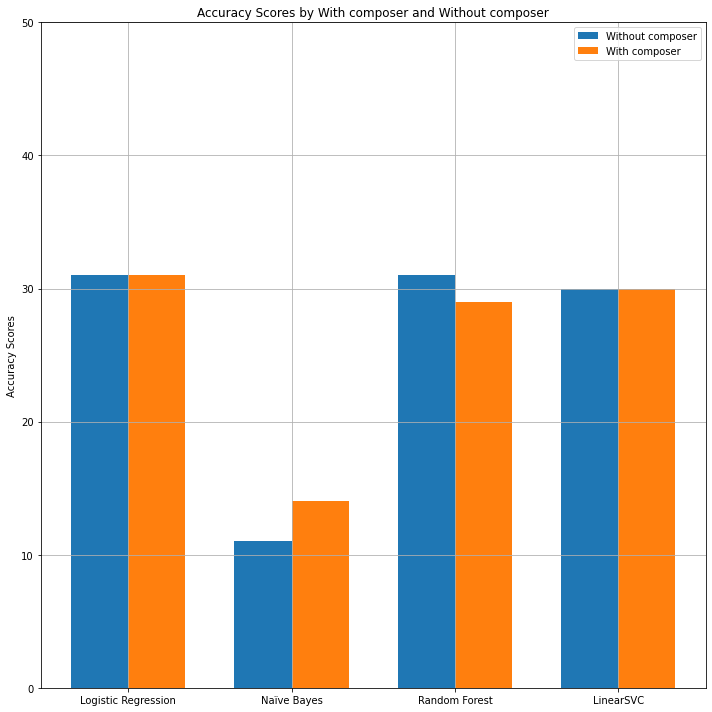

In [83]:
'''เป็นการplot กราฟเปลียบเทียบค่าความถูกต้องของแต่ละmodel'''
Bar_x = ['Logistic Regression','Naïve Bayes','Random Forest','LinearSVC']
X = np.arange(len(Bar_x))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(X - width/2, Bar_y_without_composer, width, label='Without composer')
rects2 = ax.bar(X + width/2, Bar_y_composer, width, label='With composer')
plt.grid()
plt.ylim(0,50)

ax.set_ylabel('Accuracy Scores')
ax.set_title('Accuracy Scores by With composer and Without composer')
ax.set_xticks(X)
ax.set_xticklabels(Bar_x)
ax.legend()

fig.tight_layout()

จากกราฟด้านบนจะเห็นได้ว่า Model ที่ผ่านการทำ K-fold Cross Validation เพื่อทำการวนloopในการแบ่ง train test ชุดข้อมูลแล้วนำไปเข้าmodelที่ผ่านการ tuning Parameter มาแล้ว โดยจะเห็นว่า Model ของRandom Forest นั้นมีค่าความแม่นยำที่สุดเฉพาะข้อมูลที่มีแค่เนื้อหาอย่างเดียวแต่ข้อมูลที่มีชื่อผู้แต่งนั้นมีค่าน้อยกว่าแบบไม่มีชื่อผู้แต่งแต่เมื่อดู Model อื่นๆจะเห็นว่า Logistic Regression และ LinearSVC นั้นในส่วนของข้อมูลที่มีชื่อผู้แต่งกับไม่มีชื่อผู้แต่งมีค่า Accuracy เท่ากัน ในส่วนของ Naïve Bayes ค่าAccuracy ของข้อมูลที่มีชื่อผู้แต่งจะเยอะกว่าแบบไม่มีชื่อผู้แต่ง
สรุปได้ว่า Model ของ Random Forest ได้ค่า Accuracy มากที่สุด และข้อมูลที่ได้ค่า Accuracy มากที่สุดคือข้อมูลที่ไม่มีชื่อผู้แต่ง